# 1. Bayes Classifier
Bayes Rule:

$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$

- For each class $y$, we model $p(x|y)$, rather than directly modeling $p(y|x)$.
- Learn $p(x|y) = N(\mu_{y}, \Sigma_{y})$ where $\mu_y$ is the mean of those $x$'s belongs to class $y$, $\Sigma_y$ is the covariance of those $x$'s.
# 1-1. Single Gaussian Model
Sampling from the Bayes classifier:
- Sample from a given $k$ class directly. We know $p(x|y = k)$ is a Gaussian, so that we can sample from this Gaussian. 
- Sample from $p(y)p(x|y) = p(x,y)$. Sample from $p(y)$ first. Now we have $y$, so that sample from $p(x|y)$.

1. `scipy.stats.multivariate_normal.rvs(mean=None, cov=1, size=1, random_state=None)`: Draws random samples from a multivariate normal distribution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [2]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):
        # Assume classes are numbered 0, ..., k - 1
        self.K = len(set(Y))
        self.gaussians = []
        self.p_y = np.zeros(self.K)

        # Loop through each class
        for k in range(self.K):
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            # Get the mean value (array with ndim = 1) of the y-axis (all data in the `k` class)
            mean = Xk.mean(axis=0)
            # Covariance matrix (array with )
            cov = np.cov(Xk.T)
            
            # print(cov.shape)
            # (784, 784)
            # print(cov.ndim)
            # 2
            
            # Gaussians
            g = {'m': mean, 'c': cov}
            self.gaussians.append(g)
        # Normalize p(y)
        self.p_y /= self.p_y.sum()

    # Draw random samples from a multivariate normal distribution using `mvn.rvs()`
    def sample_given_y(self, y):
        g = self.gaussians[y]
        return clamp_sample(mvn.rvs(mean=g['m'], cov=g['c']))

    # Random sampling
    def sample(self):
        # print(self.K)
        # 10
        # print(self.p_y)
        # [0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714 0.0985     0.10478571 0.0967381  0.09971429]

        # `random.choice()` generates a uniform random sample of size `K` & the probabilities associated with each entry are `p_y`
        y = np.random.choice(self.K, p=self.p_y)
        # print(y)
        # 6
        
        return clamp_sample(self.sample_given_y(y))

In [3]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("datasets/digit-recognizer/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = df.values
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [5]:
X = data[:, 1:] / 255.0
Y = data[:, 0]
X, Y = shuffle(X, Y)

In [6]:
clf = BayesClassifier()
clf.fit(X, Y)

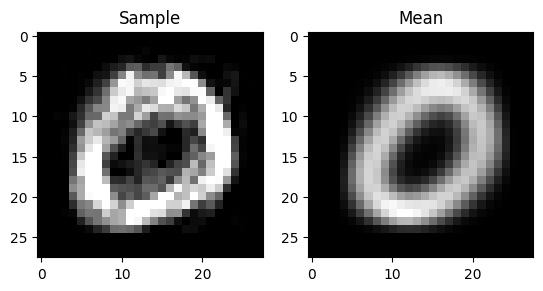

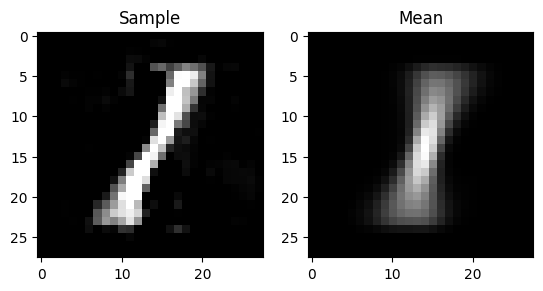

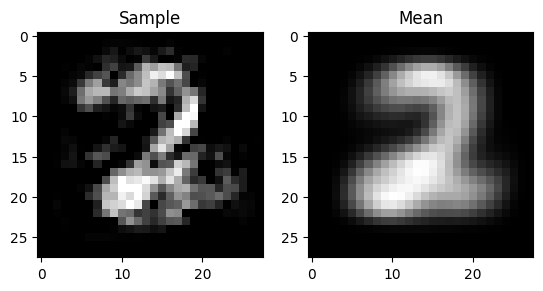

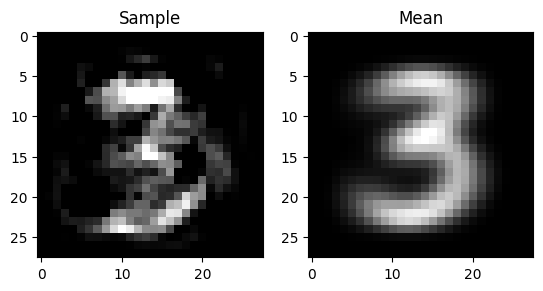

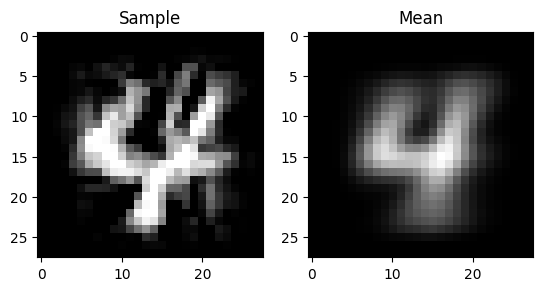

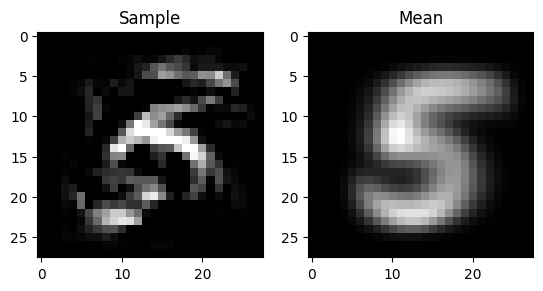

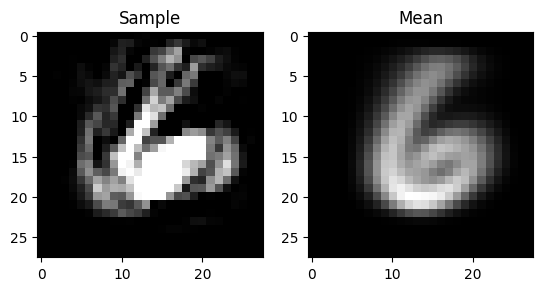

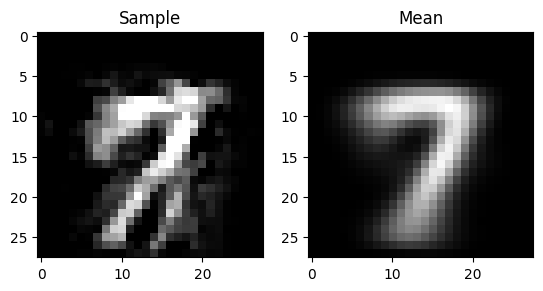

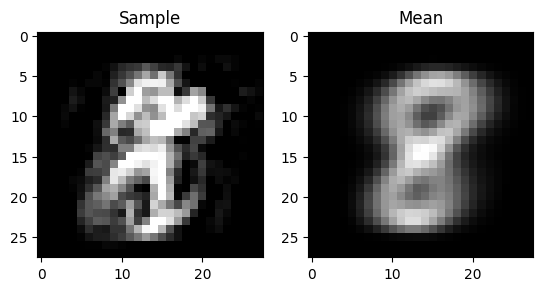

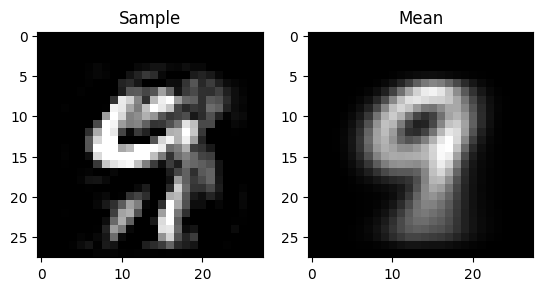

In [7]:
for k in range(clf.K):
    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

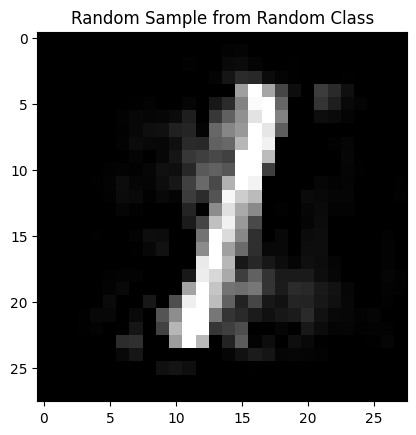

In [8]:
# Generate a random sample
sample = clf.sample().reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.show()

# 1-2. Gaussian Mixture Model
With **Gaussian Mixture Model (GMM)** for $p(x|y)$:
- We first sample from $p(y)$, class frequencies, for $y$.
- From $p(z|y)$, different writing styles, for $z$.
- Then $p(x|z,y)$.

1. `sklearn.mixture.BayesianGaussianMixture(*, n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)`: Variational Bayesian estimation of a Gaussian mixture.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [10]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):
        # Assume classes are numbered 0, ..., k - 1
        self.K = len(set(Y))
        self.gaussians = []
        self.p_y = np.zeros(self.K)

        # Loop through each class
        for k in range(self.K):
            print("Fitting GMM", k)
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            # `BayesianGaussianMixture()`
            gmm = BayesianGaussianMixture(n_components=10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)      
        # Normalize p(y)
        self.p_y /= self.p_y.sum()

    def sample_given_y(self, y):
        gmm = self.gaussians[y]

        # Return the sample & which cluster it came from
        sample = gmm.sample()
        # print(sample[0].shape)
        # (1, 784)
        # print(sample[0].ndim)
        # 2
        
        mean = gmm.means_[sample[1]]
        # print(mean.shape)
        # (1, 784)
        # print(mean.ndim)
        # 2
        
        return clamp_sample(sample[0].reshape(28, 28)), mean.reshape(28, 28)

    def sample(self):
        y = np.random.choice(self.K, p=self.p_y)
        return clamp_sample(self.sample_given_y(y))

In [11]:
clf = BayesClassifier()
clf.fit(X, Y)

Fitting GMM 0
Fitting GMM 1
Fitting GMM 2
Fitting GMM 3
Fitting GMM 4
Fitting GMM 5
Fitting GMM 6
Fitting GMM 7
Fitting GMM 8
Fitting GMM 9


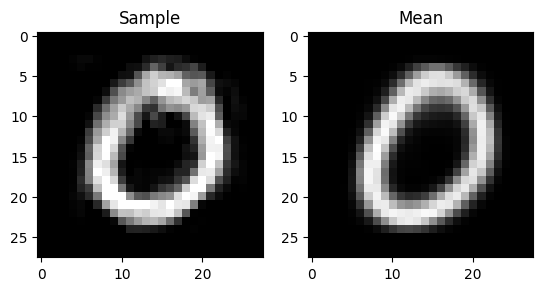

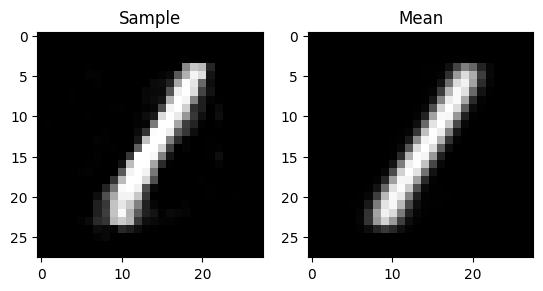

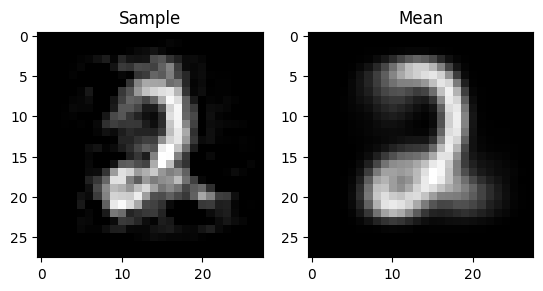

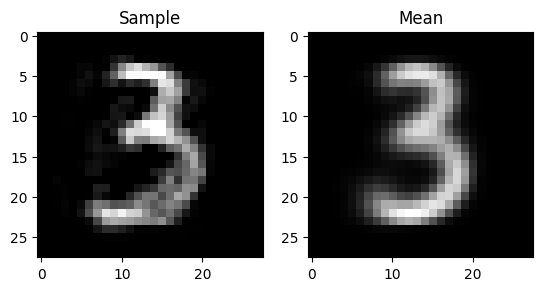

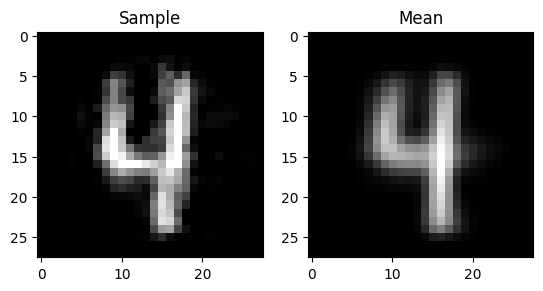

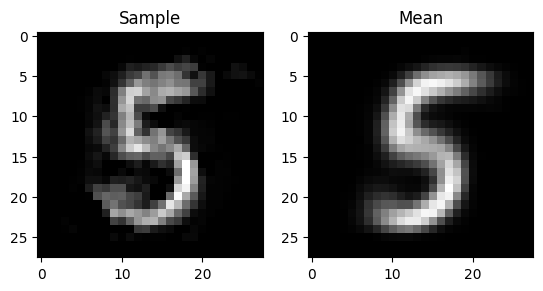

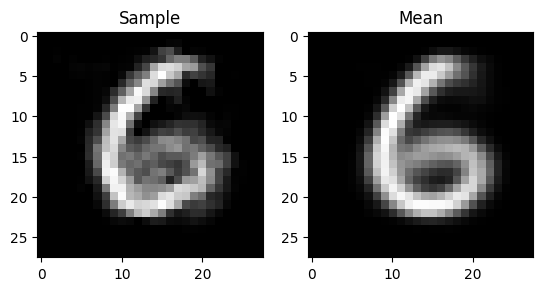

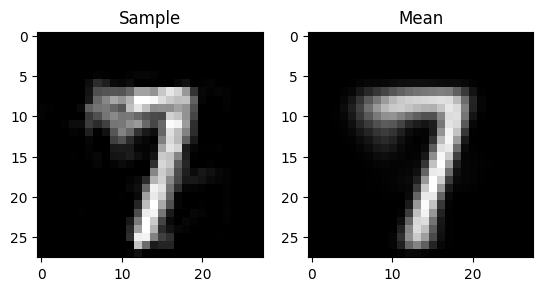

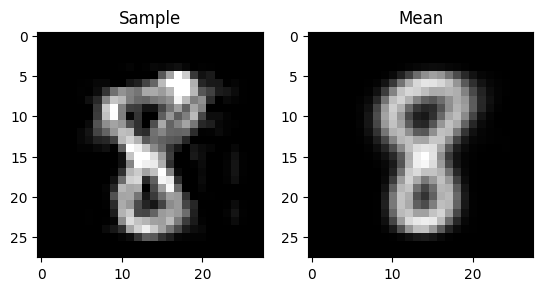

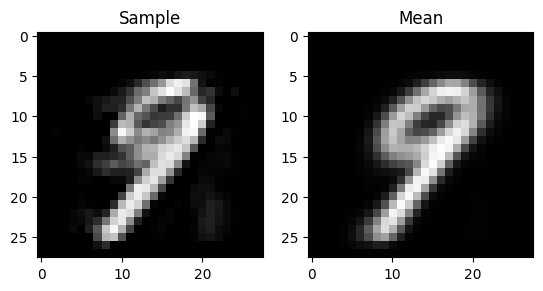

In [12]:
for k in range(clf.K):
    # Show one sample for each class also show the mean image learned
    sample, mean = clf.sample_given_y(k)

    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1, 2, 2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

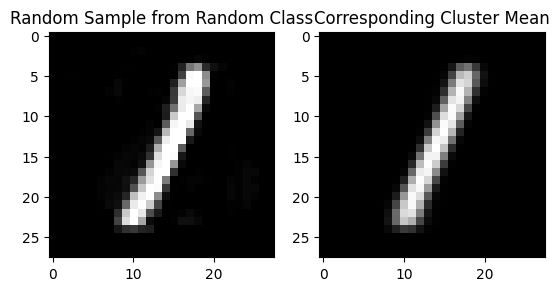

In [13]:
# Generate a random sample
sample, mean = clf.sample()
plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.subplot(1,2,2)
plt.imshow(mean, cmap='gray')
plt.title("Corresponding Cluster Mean")
plt.show()

# 2. Autoencoder
Traditional autoencoder with one hidden unit:

$z=f(W_{1}^{T}x + b_{1})$

$\hat{x}=g(W_{2}^{T}z + b_{2})$

# 3. Variational Autoencoder (VAE)

The architecture of variational autoencoders:
- The encoder outputs a mean & variance, $q(z|x)$, which represents a Gaussian trying to approximate $p(z|x)$.
- In the latent space, sample from $q(z|x)$ to get $z$.
- The decoder also outputs a distribution, $p(\hat{x}|z)$. With binary classification, we just round to get a prediction, $\hat{y}=p(y=k|x)$; with variational autoencoders, we can generate samples from a probability distribution. 

# 4. Generative Adversarial Network (GAN)